Input Image:

In [1]:
from PIL import Image
import numpy as np

input_image = Image.open("WholeHouse.tif")
image_array = np.array(input_image)
height, width = image_array.shape

print(image_array)
print(f"Shape: {image_array.shape}")  #(height, width)

[[165 171 166 ... 138 141 131]
 [136 150 172 ... 127 128 125]
 [ 91 133 167 ... 122 122 123]
 ...
 [171 155 150 ... 146 148 144]
 [176 172 160 ... 147 146 140]
 [139 139 138 ... 140 139 139]]
Shape: (300, 800)


Transform Mask In All Directions:

In [2]:
import numpy as np

def transform_mask(input_array):
    output_array = np.zeros_like(input_array)
    for i in range(3):
        for j in range(3):
            value = input_array[i,j]
            if i==1 and j==1: output_array[i,j] = value
            elif j==0 and i!=2: output_array[i+1,j] = value #down
            elif j==2 and i!=0: output_array[i-1,j] = value #up
            elif j!=2 and i==2: output_array[i,j+1] = value #left
            else: output_array[i,j-1] = value #right
    return output_array
def generate_mask_in_all_directions(input_array):
    masks=[]
    masks.append(input_array)
    for d in range(7):
        output_array = transform_mask(input_array)
        masks.append(output_array)
        input_array = output_array.copy()
    return masks


Detect Edges Algorithm in All 8 Directions:

In [3]:
import math
def detect_edges(masks_8_directions,image_array):
    threshold = 0
    num_pixels = 0
    output_array = np.zeros_like(image_array)
    for row in range(1, height - 1):
        for column in range(1, width - 1):
            pixel_magnitude = 0
            mask_sum = []
            # Apply mask in 8 directions
            for direction, mask in enumerate(masks_8_directions):
                sum = 0
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        sum += image_array[row + i, column + j] * mask[i + 1][j + 1]
                mask_sum.append(sum)
            # Calculate magnitude
            for value in mask_sum:
                pixel_magnitude += value ** 2
            pixel_magnitude = math.sqrt(pixel_magnitude)
            # Accumulate pixel magnitudes to calculate threshold
            threshold += pixel_magnitude
            num_pixels += 1
            output_array[row, column] = pixel_magnitude
    #Apply thresholding
    threshold /= num_pixels
    for row in range(height):
        for column in range(width):
            if output_array[row, column] > threshold:
                output_array[row, column] = 250
            else:
                output_array[row, column] = 16
    return output_array


Sobel Operator:

mask 0: [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

mask 1: [[2, 1, 0], [1, 0, -1], [0, -1, -2]]

mask 2: [[1, 0, -1], [2, 0, -2], [1, 0, -1]]

mask 3: [[0, -1, -2], [1, 0, -1], [2, 1, 0]]

mask 4: [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

mask 5: [[-2, -1, 0], [-1, 0, 1], [0, 1, 2]]

mask 6: [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

mask 7: [[0, 1, 2], [-1, 0, 1], [-2, -1, 0]]



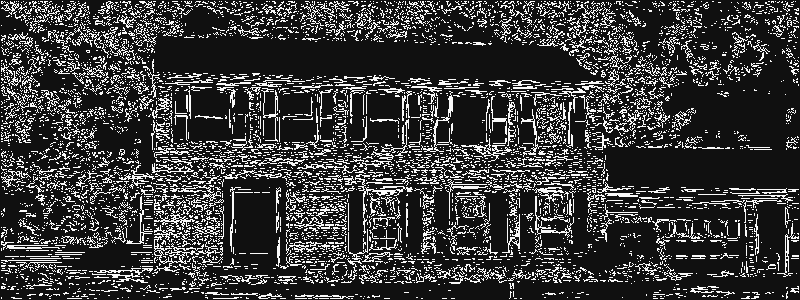

In [4]:
sobel_mask = np.array([
    [1,  2,  1],
    [0,  0,  0],
    [-1, -2, -1]
])

sobel_8_directions = generate_mask_in_all_directions(sobel_mask)
for direction, mask in enumerate(sobel_8_directions):
    print(f"mask {direction}: {mask.tolist()}\n")
    
output_array = detect_edges(sobel_8_directions,image_array)

Image.fromarray(output_array.astype(np.uint8)).save("sobel_edges_image.bmp")
Image.open("sobel_edges_image.bmp")